The House Price Predication Using Pytorch Tabular Dataset


In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv('houseprice.csv',usecols=["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
                                         "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"]).dropna()

In [3]:
data.shape

(1201, 10)

In [4]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [6]:
for i in data.columns:
    print("Column Name  {}  and unique values are {}".format(i,len(data[i].unique())))

Column Name  MSSubClass  and unique values are 15
Column Name  MSZoning  and unique values are 5
Column Name  LotFrontage  and unique values are 110
Column Name  LotArea  and unique values are 869
Column Name  Street  and unique values are 2
Column Name  LotShape  and unique values are 4
Column Name  YearBuilt  and unique values are 112
Column Name  1stFlrSF  and unique values are 678
Column Name  2ndFlrSF  and unique values are 368
Column Name  SalePrice  and unique values are 597


In [7]:
import datetime
datetime.datetime.now().year

2023

In [8]:
data['Total Years'] = datetime.datetime.now().year-data['YearBuilt']

In [9]:
data.drop("YearBuilt",axis=1,inplace=True)

In [10]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total Years'],
      dtype='object')

In [11]:
#categiorical features
cat_features=["MSSubClass","MSZoning","Street","LotShape"]
out_feature = "SalePrice"

In [12]:

from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
lbl_encoders["MSSubClass"]=LabelEncoder()
lbl_encoders["MSSubClass"].fit_transform(data["MSSubClass"])

array([5, 0, 5, ..., 6, 0, 0], dtype=int64)

In [13]:
lbl_encoders

{'MSSubClass': LabelEncoder()}

In [14]:

from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for feature in cat_features:
    lbl_encoders[feature]=LabelEncoder()
    data[feature]=lbl_encoders[feature].fit_transform(data[feature])

In [15]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,65.0,8450,1,3,856,854,208500,20
1,0,3,80.0,9600,1,3,1262,0,181500,47
2,5,3,68.0,11250,1,0,920,866,223500,22
3,6,3,60.0,9550,1,0,961,756,140000,108
4,5,3,84.0,14260,1,0,1145,1053,250000,23
...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,1,3,953,694,175000,24
1456,0,3,85.0,13175,1,3,2073,0,210000,45
1457,6,3,66.0,9042,1,3,1188,1152,266500,82
1458,0,3,68.0,9717,1,3,1078,0,142125,73


In [16]:
import numpy as np 

In [17]:
### Stacking and Converting Into Tensors
cat_features=np.stack([data['MSSubClass'],data['MSZoning'],data['Street'],data['LotShape']],1)
cat_features
                   

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]], dtype=int64)

In [18]:
### Convert numpy to Tensors
import torch
cat_features=torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [19]:
#### create continuous variable
cont_features=[]
for i in data.columns:
    if i in ["MSSubClass", "MSZoning", "Street", "LotShape","SalePrice"]:
        pass
    else:
        cont_features.append(i)

In [20]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total Years']

In [21]:
### Stacking continuous variable to a tensor
cont_values=np.stack([data[i].values for i in cont_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    20.],
        [   80.,  9600.,  1262.,     0.,    47.],
        [   68., 11250.,   920.,   866.,    22.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    82.],
        [   68.,  9717.,  1078.,     0.,    73.],
        [   75.,  9937.,  1256.,     0.,    58.]])

In [22]:
cont_values.dtype

torch.float32

In [23]:
### Dependent Feature 
y=torch.tensor(data['SalePrice'].values,dtype=torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   int32  
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   int32  
 5   LotShape     1201 non-null   int32  
 6   1stFlrSF     1201 non-null   int64  
 7   2ndFlrSF     1201 non-null   int64  
 8   SalePrice    1201 non-null   int64  
 9   Total Years  1201 non-null   int64  
dtypes: float64(1), int32(3), int64(6)
memory usage: 89.1 KB


In [25]:

cat_features.shape,cont_values.shape,y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

In [26]:

len(data['MSSubClass'].unique())

15

In [27]:

#### Embedding Size For Categorical columns
cat_dims=[len(data[col].unique()) for col in ["MSSubClass", "MSZoning", "Street", "LotShape"]]

In [28]:
cat_dims

[15, 5, 2, 4]

In [29]:
embedding_dim= [(x, min(50, (x + 1) // 2)) for x in cat_dims]

In [30]:
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [32]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [33]:
cat_featuresz=cat_features[:4]
cat_featuresz

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [34]:
pd.set_option('display.max_rows', 500)
embedding_val=[]
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i]))

In [35]:
embedding_val

[tensor([[ 1.1425,  1.2474,  0.2949,  ..., -0.0319, -0.0407, -0.2117],
         [ 0.1460,  0.4731,  0.6481,  ...,  1.1950,  0.0130, -0.9558],
         [ 1.1425,  1.2474,  0.2949,  ..., -0.0319, -0.0407, -0.2117],
         ...,
         [ 1.4541, -0.8114,  0.6091,  ..., -0.3659,  0.8305, -0.4959],
         [ 0.1460,  0.4731,  0.6481,  ...,  1.1950,  0.0130, -0.9558],
         [ 0.1460,  0.4731,  0.6481,  ...,  1.1950,  0.0130, -0.9558]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[-1.4311,  0.6086, -0.4146],
         [-1.4311,  0.6086, -0.4146],
         [-1.4311,  0.6086, -0.4146],
         ...,
         [-1.4311,  0.6086, -0.4146],
         [-1.4311,  0.6086, -0.4146],
         [-1.4311,  0.6086, -0.4146]], grad_fn=<EmbeddingBackward0>),
 tensor([[0.3731],
         [0.3731],
         [0.3731],
         ...,
         [0.3731],
         [0.3731],
         [0.3731]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.0570, -0.3590],
         [-0.0570, -0.3590],
         [-0.4084, -1.2376],

In [36]:
z = torch.cat(embedding_val, 1)
z

tensor([[ 1.1425,  1.2474,  0.2949,  ...,  0.3731, -0.0570, -0.3590],
        [ 0.1460,  0.4731,  0.6481,  ...,  0.3731, -0.0570, -0.3590],
        [ 1.1425,  1.2474,  0.2949,  ...,  0.3731, -0.4084, -1.2376],
        ...,
        [ 1.4541, -0.8114,  0.6091,  ...,  0.3731, -0.0570, -0.3590],
        [ 0.1460,  0.4731,  0.6481,  ...,  0.3731, -0.0570, -0.3590],
        [ 0.1460,  0.4731,  0.6481,  ...,  0.3731, -0.0570, -0.3590]],
       grad_fn=<CatBackward0>)

In [37]:
#### Implement dropupout
droput=nn.Dropout(.4)

In [38]:
final_embed=droput(z)
final_embed

tensor([[ 1.9041,  2.0790,  0.4915,  ...,  0.0000, -0.0000, -0.5983],
        [ 0.2434,  0.7884,  0.0000,  ...,  0.0000, -0.0950, -0.5983],
        [ 1.9041,  2.0790,  0.0000,  ...,  0.0000, -0.6806, -0.0000],
        ...,
        [ 0.0000, -1.3523,  0.0000,  ...,  0.6218, -0.0950, -0.0000],
        [ 0.2434,  0.7884,  1.0802,  ...,  0.6218, -0.0950, -0.0000],
        [ 0.2434,  0.7884,  1.0802,  ...,  0.0000, -0.0000, -0.5983]],
       grad_fn=<MulBackward0>)

In [39]:
##### Create a Feed Forward Neural Network
import torch
import torch.nn as nn
import torch.nn.functional as F
class FeedForwardNN(nn.Module):

    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [40]:
len(cont_features)

5

In [41]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)

In [42]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)


Define Loss And Optimizer

In [43]:

loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [44]:
data.shape

(1201, 10)

In [45]:
cont_values

tensor([[   65.,  8450.,   856.,   854.,    20.],
        [   80.,  9600.,  1262.,     0.,    47.],
        [   68., 11250.,   920.,   866.,    22.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    82.],
        [   68.,  9717.,  1078.,     0.,    73.],
        [   75.,  9937.,  1256.,     0.,    58.]])

In [46]:
cont_values.shape

torch.Size([1201, 5])

In [47]:
batch_size=1200
test_size=int(batch_size*0.15)
train_categorical=cat_features[:batch_size-test_size]
test_categorical=cat_features[batch_size-test_size:batch_size]
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [48]:

len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [49]:
epochs=5000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
    final_losses.append(loss.item())
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 200496.75
Epoch number: 11 and the loss : 200493.46875
Epoch number: 21 and the loss : 200489.140625
Epoch number: 31 and the loss : 200482.640625
Epoch number: 41 and the loss : 200473.25
Epoch number: 51 and the loss : 200461.375
Epoch number: 61 and the loss : 200446.421875
Epoch number: 71 and the loss : 200429.359375
Epoch number: 81 and the loss : 200407.96875
Epoch number: 91 and the loss : 200383.4375
Epoch number: 101 and the loss : 200355.265625
Epoch number: 111 and the loss : 200322.25
Epoch number: 121 and the loss : 200291.375
Epoch number: 131 and the loss : 200252.21875
Epoch number: 141 and the loss : 200206.9375
Epoch number: 151 and the loss : 200163.328125
Epoch number: 161 and the loss : 200112.109375
Epoch number: 171 and the loss : 200059.21875
Epoch number: 181 and the loss : 200006.0625
Epoch number: 191 and the loss : 199947.375
Epoch number: 201 and the loss : 199884.78125
Epoch number: 211 and the loss : 199815.46875
Epoch numb

Text(0.5, 0, 'epoch')

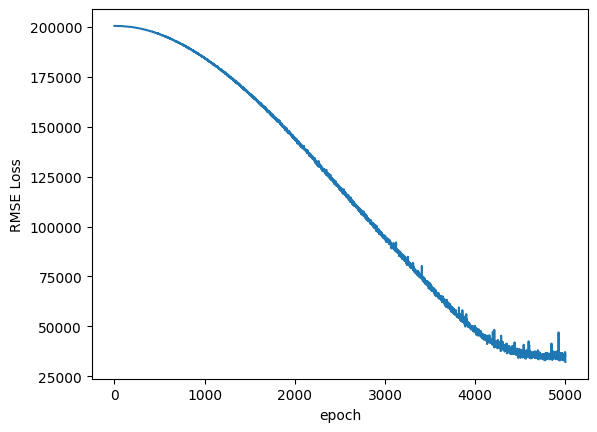

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), final_losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch')

In [51]:
#### Validate the Test Data
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))

RMSE: 38771.8828125


In [52]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])

In [53]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])

In [54]:
data_predicted

,Prediction
0,135034.859375
1,202571.578125
2,147276.937500
3,221077.296875
4,226631.312500
5,215214.906250
6,157262.859375
7,309640.437500
8,144852.984375
9,414970.000000


In [55]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,130000.0,135034.859375,-5034.859375
1,138887.0,202571.578125,-63684.578125
2,175500.0,147276.937500,28223.062500
3,195000.0,221077.296875,-26077.296875
4,142500.0,226631.312500,-84131.312500


In [56]:
#### Saving The Model
#### Save the model
torch.save(model,'HousePrice.pt')

In [57]:
torch.save(model.state_dict(),'HouseWeights.pt')

In [58]:
### Loading the saved Model
embs_size=[(15, 8), (5, 3), (2, 1), (4, 2)]
model1=FeedForwardNN(embs_size,5,1,[100,50],p=0.4)

In [59]:
model1.load_state_dict(torch.load('HouseWeights.pt'))

<All keys matched successfully>

In [60]:

model1.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)